In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import os

import _pickle as cPickle
import joblib

In [2]:
data = pd.read_csv('usapl_data.csv')

In [3]:
data

,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,M,SBD,Single-ply,27.0,24-34,24-39,M-O,92.7,93,NaN,...,Yes,USA,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
1,M,SBD,Single-ply,33.5,24-34,24-39,M-O,118.0,120,NaN,...,Yes,USA,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
2,M,SBD,Raw,24.5,24-34,24-39,MR-O,89.6,93,NaN,...,Yes,NaN,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
3,M,SBD,Single-ply,39.5,35-39,40-49,M-M1a,114.8,120,NaN,...,Yes,USA,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
4,M,SBD,Raw,40.5,40-44,40-49,MR-M1a,129.7,120+,NaN,...,Yes,USA,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214194,M,SBD,Single-ply,18.0,18-19,NaN,M-O,82.1,82.5,NaN,...,Yes,USA,MS,USAPL,IPF,2008-08-02,USA,MS,Philadelphia,State Meet
214195,M,SBD,Single-ply,51.0,50-54,50-59,M-O,NaN,125+,NaN,...,Yes,USA,MS,USAPL,IPF,2008-08-02,USA,MS,Philadelphia,State Meet
214196,M,SBD,Single-ply,17.0,16-17,14-18,M-O,82.1,82.5,NaN,...,Yes,USA,MS,USAPL,IPF,2008-08-02,USA,MS,Philadelphia,State Meet
214197,M,SBD,Single-ply,21.0,20-23,19-23,M-O,NaN,125+,NaN,...,Yes,USA,MS,USAPL,IPF,2008-08-02,USA,MS,Philadelphia,State Meet


In [4]:
data.dtypes

Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation     object
Date                

In [5]:
data.isnull().sum()

Sex                      0
Event                    0
Equipment                0
Age                  29496
AgeClass             22925
BirthYearClass       25177
Division                 0
BodyweightKg          2640
WeightClassKg          775
Squat1Kg             69074
Squat2Kg             70052
Squat3Kg             72156
Squat4Kg            214199
Best3SquatKg         34381
Bench1Kg             54061
Bench2Kg             55099
Bench3Kg             57282
Bench4Kg            214156
Best3BenchKg         10547
Deadlift1Kg          65008
Deadlift2Kg          66857
Deadlift3Kg          69539
Deadlift4Kg         214198
Best3DeadliftKg      26065
TotalKg              11179
Place                    0
Dots                 13534
Wilks                13534
Glossbrenner         13534
Goodlift             22445
Tested                   0
Country              36738
State                75454
Federation               0
ParentFederation      4129
Date                     0
MeetCountry              0
M

In [8]:
for column in data.columns:
    if data[column].isnull().sum() > 30000:
#         print(column)
        print(f'{column}: {data[column].isnull().sum()} null values')

Squat1Kg: 69074 null values
Squat2Kg: 70052 null values
Squat3Kg: 72156 null values
Squat4Kg: 214199 null values
Best3SquatKg: 34381 null values
Bench1Kg: 54061 null values
Bench2Kg: 55099 null values
Bench3Kg: 57282 null values
Bench4Kg: 214156 null values
Deadlift1Kg: 65008 null values
Deadlift2Kg: 66857 null values
Deadlift3Kg: 69539 null values
Deadlift4Kg: 214198 null values
Country: 36738 null values
State: 75454 null values
MeetTown: 131581 null values


In [9]:
raw_lifters = data[data['Equipment'] == 'Raw']

In [10]:
raw_lifters

,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2,M,SBD,Raw,24.5,24-34,24-39,MR-O,89.6,93,NaN,...,Yes,NaN,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
4,M,SBD,Raw,40.5,40-44,40-49,MR-M1a,129.7,120+,NaN,...,Yes,USA,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
5,M,SBD,Raw,46.5,45-49,40-49,MR-M1b,93.4,105,NaN,...,Yes,USA,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
6,F,SBD,Raw,21.5,20-23,19-23,FR-Jr,65.3,72,NaN,...,Yes,NaN,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
8,F,SBD,Raw,40.5,40-44,40-49,FR-M1a,62.7,63,NaN,...,Yes,NaN,NaN,USAPL,IPF,2015-02-07,USA,WA,NaN,Team Phoinix Qualifyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213920,M,SBD,Raw,16.5,16-17,14-18,MR-T2,59.2,60,NaN,...,Yes,USA,NaN,USAPL,IPF,2012-01-01,USA,NaN,NaN,7th Northeastern Regional Powerlifting Champio...
213922,M,SBD,Raw,19.5,20-23,19-23,MR-T3,87.0,90,NaN,...,Yes,NaN,NaN,USAPL,IPF,2012-01-01,USA,NaN,NaN,7th Northeastern Regional Powerlifting Champio...
213926,M,SBD,Raw,12.0,5-12,NaN,MR-Y,51.0,52,NaN,...,Yes,USA,NaN,USAPL,IPF,2012-01-01,USA,NaN,NaN,7th Northeastern Regional Powerlifting Champio...
213933,M,BD,Raw,50.5,50-54,50-59,MR-M2a,99.1,100,NaN,...,Yes,NaN,NaN,USAPL,IPF,2012-01-01,USA,NaN,NaN,7th Northeastern Regional Powerlifting Champio...


In [11]:
raw_lifters.isnull().sum()

Sex                      0
Event                    0
Equipment                0
Age                   4003
AgeClass              3753
BirthYearClass        5901
Division                 0
BodyweightKg           220
WeightClassKg          443
Squat1Kg             23617
Squat2Kg             24263
Squat3Kg             25812
Squat4Kg            140815
Best3SquatKg         16762
Bench1Kg             13805
Bench2Kg             14415
Bench3Kg             16068
Bench4Kg            140815
Best3BenchKg          5113
Deadlift1Kg          19802
Deadlift2Kg          21053
Deadlift3Kg          23027
Deadlift4Kg         140815
Best3DeadliftKg      10904
TotalKg               5812
Place                    0
Dots                  5984
Wilks                 5984
Glossbrenner          5984
Goodlift             11986
Tested                   0
Country               9153
State                22933
Federation               0
ParentFederation      3874
Date                     0
MeetCountry              0
M

In [12]:
# Can drop these columns, too many nan values
for column in raw_lifters.columns:
    if raw_lifters[column].isnull().sum() > 30000:
        print(column)

Squat4Kg
Bench4Kg
Deadlift4Kg
MeetTown


In [13]:
raw_lifters.drop(['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg', 'MeetTown'], axis=1, inplace=True)

/Users/jasonzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
clean = raw_lifters.dropna()

In [15]:
# Completely clean dataset
clean.isnull().sum()

Sex                 0
Event               0
Equipment           0
Age                 0
AgeClass            0
BirthYearClass      0
Division            0
BodyweightKg        0
WeightClassKg       0
Squat1Kg            0
Squat2Kg            0
Squat3Kg            0
Best3SquatKg        0
Bench1Kg            0
Bench2Kg            0
Bench3Kg            0
Best3BenchKg        0
Deadlift1Kg         0
Deadlift2Kg         0
Deadlift3Kg         0
Best3DeadliftKg     0
TotalKg             0
Place               0
Dots                0
Wilks               0
Glossbrenner        0
Goodlift            0
Tested              0
Country             0
State               0
Federation          0
ParentFederation    0
Date                0
MeetCountry         0
MeetState           0
MeetName            0
dtype: int64

In [16]:
clean.sort_values(['AgeClass', 'Age'], inplace=True)

<ipython-input-16-430ae4343027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.sort_values(['AgeClass', 'Age'], inplace=True)


In [17]:
clean

,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
1057,M,SBD,Raw,13.0,13-15,14-18,MR-O,63.20,66,102.5,...,56.23,Yes,USA,CT,USAPL,IPF,2017-05-06,USA,CT,Connecticut State Championships and Spring Cla...
1094,M,SBD,Raw,13.0,13-15,14-18,MR-T,63.20,66,102.5,...,56.23,Yes,USA,CT,USAPL,IPF,2017-05-06,USA,CT,Connecticut State Championships and Spring Cla...
4388,F,SBD,Raw,13.0,13-15,14-18,FR-Y3,44.20,47,57.5,...,55.39,Yes,USA,CO,USAPL,IPF,2020-01-19,USA,AZ,Wicked Strong Women
24815,F,SBD,Raw,13.0,13-15,14-18,FR-Y,65.90,72,95.0,...,62.23,Yes,USA,IN,USAPL,IPF,2018-01-27,USA,IN,Hoosier Open
24931,M,SBD,Raw,13.0,13-15,14-18,MR-Y3,94.30,105,-112.5,...,52.95,Yes,USA,CA,USAPL,IPF,2016-03-19,USA,CA,Brand X Method youth/teen/junior Showdown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17187,M,SBD,Raw,85.0,80-999,70-999,MR-M5b,80.60,83,60.0,...,34.07,Yes,USA,MD,USAPL,IPF,2015-10-15,USA,PA,Raw Nationals
96109,M,SBD,Raw,85.5,80-999,70-999,MR-M5,88.70,93,30.0,...,23.10,Yes,USA,NC,USAPL,IPF,2018-08-18,USA,NC,Southeast Regional
126249,F,SBD,Raw,90.0,80-999,70-999,FR-M6,71.34,72,-20.0,...,18.31,Yes,USA,FL,USAPL,IPF,2017-08-05,USA,FL,Southeast Regionals
69019,F,SBD,Raw,91.5,80-999,70-999,FR-M6,70.40,72,-20.0,...,17.42,Yes,USA,FL,USAPL,IPF,2019-02-23,USA,FL,Jacksonville Open Championships


In [57]:
# clean.to_csv('no_null_vals.csv', index=False)

In [18]:
clean.dtypes

Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation     object
Date                 object
MeetCountry          object
MeetState            object
MeetName            

In [19]:
clean = clean[clean['Sex'] != 'Mx']

clean['AgeClass'].unique()
# 18-19 through 35-39 are the important categories

array(['13-15', '16-17', '18-19', '20-23', '24-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-999'], dtype=object)

In [20]:
clean.groupby('AgeClass').agg('count')

,Sex,Event,Equipment,Age,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
AgeClass,,,,,,,,,,,,,,,,,,,,,
13-15,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,...,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112
16-17,5772,5772,5772,5772,5772,5772,5772,5772,5772,5772,...,5772,5772,5772,5772,5772,5772,5772,5772,5772,5772
18-19,9248,9248,9248,9248,9248,9248,9248,9248,9248,9248,...,9248,9248,9248,9248,9248,9248,9248,9248,9248,9248
20-23,24404,24404,24404,24404,24404,24404,24404,24404,24404,24404,...,24404,24404,24404,24404,24404,24404,24404,24404,24404,24404
24-34,33299,33299,33299,33299,33299,33299,33299,33299,33299,33299,...,33299,33299,33299,33299,33299,33299,33299,33299,33299,33299
35-39,5089,5089,5089,5089,5089,5089,5089,5089,5089,5089,...,5089,5089,5089,5089,5089,5089,5089,5089,5089,5089
40-44,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,...,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547
45-49,3295,3295,3295,3295,3295,3295,3295,3295,3295,3295,...,3295,3295,3295,3295,3295,3295,3295,3295,3295,3295
50-54,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,...,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377


In [21]:
ages = ['18-19', '20-23', '24-34', '35-39']
clean_ages = clean[clean.AgeClass.isin(ages) == True]

In [22]:
important_cols = ['Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 
                  'Best3DeadliftKg', 'TotalKg', 'Country', 'Date']
clean_ages = clean_ages[important_cols]

<AxesSubplot:>

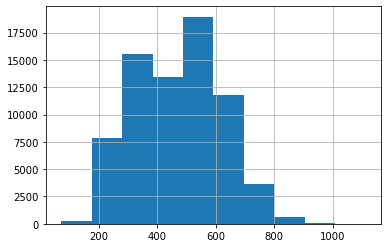

In [23]:
clean_ages['TotalKg'].hist()

<AxesSubplot:xlabel='AgeClass', ylabel='count'>

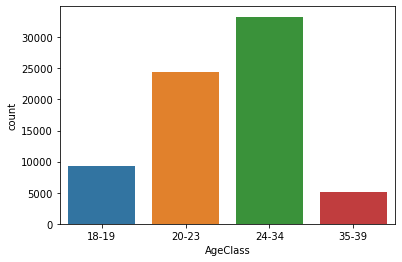

In [24]:
sns.countplot(x='AgeClass', data=clean_ages)
# Most of the data is concentrated between the 18-19 and 35-39 age ranges

<AxesSubplot:xlabel='Sex', ylabel='count'>

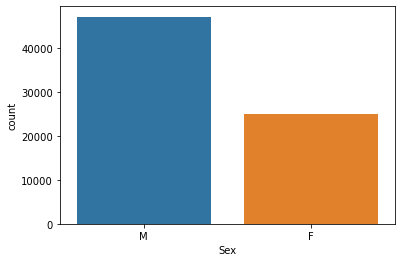

In [25]:
sns.countplot(x='Sex', data=clean_ages)

In [26]:
clean_ages['Sex'].value_counts()
# Model would not generalize well with the Mx label

M    47097
F    24943
Name: Sex, dtype: int64

In [98]:
clean_ages

,Sex,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Country,Date
36,M,17.5,18-19,72.45,74,165.0,107.5,195.0,467.5,USA,2018-11-10
51,M,17.5,18-19,72.45,74,165.0,107.5,195.0,467.5,USA,2018-11-10
328,M,17.5,18-19,68.20,74,160.0,110.0,190.0,460.0,USA,2017-07-22
460,M,17.5,18-19,65.60,67.5,145.0,82.5,170.0,397.5,USA,2016-02-13
462,M,17.5,18-19,74.30,75,107.5,82.5,170.0,360.0,USA,2016-02-13
...,...,...,...,...,...,...,...,...,...,...,...
151383,M,39.5,35-39,104.30,105,197.5,115.0,227.5,540.0,USA,2021-07-24
151384,M,39.5,35-39,104.30,105,197.5,115.0,227.5,540.0,USA,2021-07-24
151396,M,39.5,35-39,104.30,105,197.5,115.0,227.5,540.0,USA,2021-07-24
151984,M,39.5,35-39,83.00,83,187.5,112.5,265.0,565.0,USA,2017-12-02


In [100]:
clean_ages[clean_ages['Sex'] == 'M']['WeightClassKg'].unique()

array(['74', '67.5', '75', '110', '125', '66', '93', '83', '120+', '105',
       '120', '59', '53', '60', '90', '100', '82.5', '125+', '52', '56',
       '40'], dtype=object)

In [28]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [92]:
'''
USAPL RECENTLY UPDATED WEIGHT CLASSES, WE CAN DROP THAT BECAUSE BODYWEIGHT ACCOUNTS FOR IT ALREADY
'''



# d_features = clean_ages[['Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg']]
# d_target = clean_ages['Best3DeadliftKg']
# b_features = clean_ages[['Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Best3SquatKg', 'Best3DeadliftKg']]
# b_target = clean_ages['Best3BenchKg']
# s_features = clean_ages[['Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Best3DeadliftKg', 'Best3BenchKg']]
# s_target = clean_ages['Best3SquatKg']
features = clean_ages[['Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Best3BenchKg', 'Best3SquatKg']]
target = clean_ages['Best3DeadliftKg']

features_to_encode = ['Sex', 'AgeClass', 'WeightClassKg']
# features_to_encode = ['Sex']
for feature in features_to_encode:
    features = encode_and_bind(features, feature)

In [97]:
features

,Age,BodyweightKg,Best3BenchKg,Best3SquatKg,Sex_F,Sex_M,AgeClass_18-19,AgeClass_20-23,AgeClass_24-34,AgeClass_35-39,...,WeightClassKg_74,WeightClassKg_75,WeightClassKg_76,WeightClassKg_82.5,WeightClassKg_83,WeightClassKg_84,WeightClassKg_84+,WeightClassKg_90,WeightClassKg_90+,WeightClassKg_93
36,17.5,72.45,107.5,165.0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51,17.5,72.45,107.5,165.0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
328,17.5,68.20,110.0,160.0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
460,17.5,65.60,82.5,145.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
462,17.5,74.30,82.5,107.5,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151383,39.5,104.30,115.0,197.5,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
151384,39.5,104.30,115.0,197.5,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
151396,39.5,104.30,115.0,197.5,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
151984,39.5,83.00,112.5,187.5,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data(features only)
scaler.fit(X_train)

# Transform X_train and X_test based on the (same) scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Replace any potential NaN with 0
X_train_scaled[np.isnan(X_train_scaled)] = 0
X_test_scaled[np.isnan(X_test_scaled)] = 0

ValueError: could not convert string to float: 'M'

In [78]:
def train_test_scaled_split(features, target):
    
    features_to_encode = ['Sex', 'AgeClass', 'WeightClassKg']
    for feature in features_to_encode:
        features = encode_and_bind(features, feature)
    
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

    # Create the scaler
    scaler = MinMaxScaler()

    # Fit the scaler to the training data(features only)
    scaler.fit(X_train)

    # Transform X_train and X_test based on the (same) scaler
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Replace any potential NaN with 0
    X_train_scaled[np.isnan(X_train_scaled)] = 0
    X_test_scaled[np.isnan(X_test_scaled)] = 0
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [79]:
pred_map = {'Squat': [s_features, s_target], 'Bench': [b_features, b_target], 'Deadlift': [d_features, d_target]}

In [82]:
for lift, data in pred_map.items():
    
    features, target = data
    
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_scaled_split(features, target)
    
    model = RandomForestRegressor().fit(X=X_train_scaled, y=y_train)

    # Prediction results
    print(lift + ":\n")
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
    print("\tMean-squared-error value for training set: ", mean_squared_error(y_train, model.predict(X_train_scaled)))
    print("\n")
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_scaled)))
    print("\tMean-squared-error value for testing set: ", mean_squared_error(y_test, model.predict(X_test_scaled)))
    print("\n")
    best_models[lift] = model

Squat:

	R-squared value for training set:  0.9880460384043707
	Mean-squared-error value for training set:  35.91820781642619


	R-squared value for testing set:  0.9139072872467823
	Mean-squared-error value for testing set:  256.8115370542975


Bench:

	R-squared value for training set:  0.985904555332287
	Mean-squared-error value for training set:  23.252833195985946


	R-squared value for testing set:  0.9021833451408164
	Mean-squared-error value for testing set:  161.01453493964493


Deadlift:

	R-squared value for training set:  0.9867802468289215
	Mean-squared-error value for training set:  41.397382972694984


	R-squared value for testing set:  0.9028722553319477
	Mean-squared-error value for testing set:  304.2044437321251




In [81]:
best_models = {}

In [88]:
scalers = {}

In [87]:
best_models

{'Squat': RandomForestRegressor(),
 'Bench': RandomForestRegressor(),
 'Deadlift': RandomForestRegressor()}

In [90]:
scalers

{'Squat': MinMaxScaler(), 'Bench': MinMaxScaler(), 'Deadlift': MinMaxScaler()}

In [91]:
for lift, model in best_models.items():
    with open(f'{lift}_model.pickle', 'wb') as output_file:
        cPickle.dump(model, output_file)
    
for lift, scaler in scalers.items():
    scaler_filename = f'{lift}_scaler'
    joblib.dump(scaler, scaler_filename)
    

In [89]:
for lift, data in pred_map.items():
    
    features, target = data
    
    features_to_encode = ['Sex', 'AgeClass', 'WeightClassKg']
    
    for feature in features_to_encode:
        features = encode_and_bind(features, feature)
    
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

    # Create the scaler
    scaler = MinMaxScaler()

    # Fit the scaler to the training data(features only)
    scaler.fit(X_train)
    
    scalers[lift] = scaler
    
    

In [ ]:
scaler_filename = f'..{os.path.sep}models{os.path.sep}tennis_minmax_scaler'
joblib.dump(scaler, scaler_filename)

In [ ]:
with open(f'..{os.path.sep}models{os.path.sep}logreg_model.pickle', 'wb') as output_file:
    cPickle.dump(best_models['Logistic Regression'], output_file)

In [85]:
best_param_models = {}

In [86]:
scoring = {"Max Error": "max_error", "R-squared": "r2"}


for lift, data in pred_map.items():
    
    features, target = data
    
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_scaled_split(features, target)
    
    param_grid = {"max_depth":[3, 5, 7, 9, 11]}
    
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid, scoring=scoring, refit='R-squared', return_train_score=True, cv=5)
    
    # Fit the grid search object on the training data (CV will be performed on this)
    grid_search.fit(X=X_train_scaled, y=y_train)
    
    # Grid search results
    print(lift + ":\n")
    print("\tBest estimator: ", grid_search.best_estimator_)
    print("\tBest parameters: ", grid_search.best_params_)
    print("\tBest cross-validation score: ", grid_search.best_score_)
    print("\n")
    
    model = grid_search.best_estimator_
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
    print("\tMean-squared-error value for training set: ", mean_squared_error(y_train, model.predict(X_train_scaled)))
    print("\n")
    
    # Add the best model to dictionary
    best_param_models[estimator_name] = grid_search.best_estimator_

Squat:

	Best estimator:  RandomForestRegressor(max_depth=11)
	Best parameters:  {'max_depth': 11}
	Best cross-validation score:  0.9131826837496355


	R-squared value for training set:  0.9326823018820231
	Mean-squared-error value for training set:  202.27027261063006


Bench:

	Best estimator:  RandomForestRegressor(max_depth=11)
	Best parameters:  {'max_depth': 11}
	Best cross-validation score:  0.8968539761680232


	R-squared value for training set:  0.9164585418776493
	Mean-squared-error value for training set:  137.8158430941977


Deadlift:

	Best estimator:  RandomForestRegressor(max_depth=11)
	Best parameters:  {'max_depth': 11}
	Best cross-validation score:  0.9042689391713665


	R-squared value for training set:  0.9210479496618245
	Mean-squared-error value for training set:  247.23670873669528




In [63]:
# Parameter grids for Validation/Optimization
ridge_param_grid = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100]}
lasso_param_grid = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100]}
knn_param_grid = {"n_neighbors":[1, 5, 10], "metric": ['euclidean', 'manhattan', 'minkowski']}
tree_param_grid = {"max_depth":[3, 5, 7, 9, 11]}
forest_param_grid = {"max_depth":[3, 5, 7, 9, 11]}

# Dictionary of models with their parameter grids
estimators = {
    'Ridge': [Ridge(), ridge_param_grid],
    'Lasso': [Lasso(), lasso_param_grid],
    'k-Nearest Neighbor': [KNeighborsRegressor(), knn_param_grid],
    'Decision Tree': [DecisionTreeRegressor(), tree_param_grid],
    'Random Forest': [RandomForestRegressor(), forest_param_grid]}

In [64]:
# Initial Model Performance Analysis

print("Initial Results for Models Trained on All Features\n")
for estimator_name, estimator_objects in estimators.items():
    estimator_model = estimator_objects[0]

    model = estimator_model.fit(X=X_train_scaled, y=y_train)

    # Prediction results
    print(estimator_name + ":\n")
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
    print("\tMean-squared-error value for training set: ", mean_squared_error(y_train, model.predict(X_train_scaled)))
    print("\n")
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_scaled)))
    print("\tMean-squared-error value for testing set: ", mean_squared_error(y_test, model.predict(X_test_scaled)))
    print("\n")

Initial Results for Models Trained on All Features

Ridge:

	R-squared value for training set:  0.898504968343617
	Mean-squared-error value for training set:  317.8295873554723


	R-squared value for testing set:  0.8962298550449012
	Mean-squared-error value for testing set:  325.0084651914204


Lasso:

	R-squared value for training set:  0.8604159502657829
	Mean-squared-error value for training set:  437.10455777410425


	R-squared value for testing set:  0.8591452403723664
	Mean-squared-error value for testing set:  441.1576109996967


k-Nearest Neighbor:

	R-squared value for training set:  0.9281983657588784
	Mean-squared-error value for training set:  224.84532897693873


	R-squared value for testing set:  0.8878280908548475
	Mean-squared-error value for testing set:  351.32282068828425


Decision Tree:

	R-squared value for training set:  0.9997418966085204
	Mean-squared-error value for training set:  0.808245419211549


	R-squared value for testing set:  0.8250143648717643
	Mean

In [44]:
'''
FOR DEADLIFT RANDOM FOREST IS BEST
Initial Results for Models Trained on All Features

Ridge:

	R-squared value for training set:  0.900791795329309
	Mean-squared-error value for training set:  310.66843606211154


	R-squared value for testing set:  0.8982009899083301
	Mean-squared-error value for testing set:  318.8348637482929


Lasso:

	R-squared value for training set:  0.8604311108121666
	Mean-squared-error value for training set:  437.057082837424


	R-squared value for testing set:  0.8591595054946677
	Mean-squared-error value for testing set:  441.11293258562176


k-Nearest Neighbor:

	R-squared value for training set:  0.9268768144787918
	Mean-squared-error value for training set:  228.9837394110679


	R-squared value for testing set:  0.885514033615932
	Mean-squared-error value for testing set:  358.57045623808995
    
    
Decision Tree:

	R-squared value for training set:  0.9997456336932952
	Mean-squared-error value for training set:  0.796542815719662


	R-squared value for testing set:  0.8247594118265117
	Mean-squared-error value for testing set:  548.8541490054909


Random Forest:

	R-squared value for training set:  0.9867339096710506
	Mean-squared-error value for training set:  41.54248682186873


	R-squared value for testing set:  0.9029074378444212
	Mean-squared-error value for testing set:  304.09425197720844
    
    
    
    
    
WITHOUT CLASSES
Ridge:

	R-squared value for training set:  0.898504968343617
	Mean-squared-error value for training set:  317.8295873554723


	R-squared value for testing set:  0.8962298550449012
	Mean-squared-error value for testing set:  325.0084651914204


Lasso:

	R-squared value for training set:  0.8604159502657829
	Mean-squared-error value for training set:  437.10455777410425


	R-squared value for testing set:  0.8591452403723664
	Mean-squared-error value for testing set:  441.1576109996967


k-Nearest Neighbor:

	R-squared value for training set:  0.9281983657588784
	Mean-squared-error value for training set:  224.84532897693873


	R-squared value for testing set:  0.8878280908548475
	Mean-squared-error value for testing set:  351.32282068828425


Decision Tree:

	R-squared value for training set:  0.9997418966085204
	Mean-squared-error value for training set:  0.808245419211549


	R-squared value for testing set:  0.8250143648717643
	Mean-squared-error value for testing set:  548.0556351557776


Random Forest:

	R-squared value for training set:  0.986720766316167
	Mean-squared-error value for training set:  41.58364496518781


	R-squared value for testing set:  0.9025839068349805
	Mean-squared-error value for testing set:  305.1075522560664
'''

'\nFOR DEADLIFT RANDOM FOREST IS BEST\nInitial Results for Models Trained on All Features\n\nRidge:\n\n\tR-squared value for training set:  0.900791795329309\n\tMean-squared-error value for training set:  310.66843606211154\n\n\n\tR-squared value for testing set:  0.8982009899083301\n\tMean-squared-error value for testing set:  318.8348637482929\n\n\nLasso:\n\n\tR-squared value for training set:  0.8604311108121666\n\tMean-squared-error value for training set:  437.057082837424\n\n\n\tR-squared value for testing set:  0.8591595054946677\n\tMean-squared-error value for testing set:  441.11293258562176\n\n\nk-Nearest Neighbor:\n\n\tR-squared value for training set:  0.9268768144787918\n\tMean-squared-error value for training set:  228.9837394110679\n\n\n\tR-squared value for testing set:  0.885514033615932\n\tMean-squared-error value for testing set:  358.57045623808995\n    \n    \nDecision Tree:\n\n\tR-squared value for training set:  0.9997456336932952\n\tMean-squared-error value for 

In [ ]:
'''
FOR BENCH
Ridge:

	R-squared value for training set:  0.892988866535197
	Mean-squared-error value for training set:  176.53306406644927


	R-squared value for testing set:  0.8964825991149635
	Mean-squared-error value for testing set:  170.39844784776005


Lasso:

	R-squared value for training set:  0.8145834294703707
	Mean-squared-error value for training set:  305.8761669415857


	R-squared value for testing set:  0.8166275930373708
	Mean-squared-error value for testing set:  301.8465809360993


k-Nearest Neighbor:

	R-squared value for training set:  0.9226421141450587
	Mean-squared-error value for training set:  127.61498899707571


	R-squared value for testing set:  0.8842375523053484
	Mean-squared-error value for testing set:  190.55483655480288


Decision Tree:

	R-squared value for training set:  0.9997902915333114
	Mean-squared-error value for training set:  0.3459497809858721


	R-squared value for testing set:  0.8164845794658392
	Mean-squared-error value for testing set:  302.0819934406811


Random Forest:

	R-squared value for training set:  0.9858845429595768
	Mean-squared-error value for training set:  23.285847008281845


	R-squared value for testing set:  0.9021000538156578
	Mean-squared-error value for testing set:  161.1516395462605
    
    
    
    
    
WITHOUT CLASSES
Ridge:

	R-squared value for training set:  0.8904680622199737
	Mean-squared-error value for training set:  180.69155949837258


	R-squared value for testing set:  0.8941704889775871
	Mean-squared-error value for testing set:  174.20437781985777


Lasso:

	R-squared value for training set:  0.8139401495175196
	Mean-squared-error value for training set:  306.9373666266323


	R-squared value for testing set:  0.8160193189895053
	Mean-squared-error value for testing set:  302.8478517633823


k-Nearest Neighbor:

	R-squared value for training set:  0.9230868882485617
	Mean-squared-error value for training set:  126.88125847047938


	R-squared value for testing set:  0.8861075022450645
	Mean-squared-error value for testing set:  187.47673988162134


Decision Tree:

	R-squared value for training set:  0.9997902564728233
	Mean-squared-error value for training set:  0.346007619223888


	R-squared value for testing set:  0.8173917138206432
	Mean-squared-error value for testing set:  300.58877312480723


Random Forest:

	R-squared value for training set:  0.9858982376597523
	Mean-squared-error value for training set:  23.26325527128061


	R-squared value for testing set:  0.9018881160223156
	Mean-squared-error value for testing set:  161.50050718317019
'''

In [ ]:
'''
FOR SQUAT
Ridge:

	R-squared value for training set:  0.9105562760189563
	Mean-squared-error value for training set:  268.75260056053975


	R-squared value for testing set:  0.9104550067401644
	Mean-squared-error value for testing set:  267.1095685007973


Lasso:

	R-squared value for training set:  0.8794849681241365
	Mean-squared-error value for training set:  362.11292175333625


	R-squared value for testing set:  0.8809785596583386
	Mean-squared-error value for testing set:  355.036774415219


k-Nearest Neighbor:

	R-squared value for training set:  0.9340890035860671
	Mean-squared-error value for training set:  198.04353959518784


	R-squared value for testing set:  0.8993721303492088
	Mean-squared-error value for testing set:  300.1693993496946


Decision Tree:

	R-squared value for training set:  0.9998465488672468
	Mean-squared-error value for training set:  0.46107640816830153


	R-squared value for testing set:  0.842712904857357
	Mean-squared-error value for testing set:  469.1818781244988


Random Forest:

	R-squared value for training set:  0.98807146372382
	Mean-squared-error value for training set:  35.84181206256046


	R-squared value for testing set:  0.9142998788291369
	Mean-squared-error value for testing set:  255.6404501588471
    
    
    
    
WITHOUT CLASSES
Ridge:

	R-squared value for training set:  0.9100313257045812
	Mean-squared-error value for training set:  270.3299248922422


	R-squared value for testing set:  0.9101631812638482
	Mean-squared-error value for testing set:  267.980073642611


Lasso:

	R-squared value for training set:  0.879482610475747
	Mean-squared-error value for training set:  362.12000580694723


	R-squared value for testing set:  0.8809764546205674
	Mean-squared-error value for testing set:  355.04305366892487


k-Nearest Neighbor:

	R-squared value for training set:  0.9353216809041093
	Mean-squared-error value for training set:  194.33969968188046


	R-squared value for testing set:  0.9005989534753995
	Mean-squared-error value for testing set:  296.50982907184897


Decision Tree:

	R-squared value for training set:  0.9998460483885462
	Mean-squared-error value for training set:  0.4625802023567154


	R-squared value for testing set:  0.8425767179090207
	Mean-squared-error value for testing set:  469.5881190061077


Random Forest:

	R-squared value for training set:  0.9879984822578319
	Mean-squared-error value for training set:  36.06110032454263


	R-squared value for testing set:  0.9139984869229377
	Mean-squared-error value for testing set:  256.5394916248604
'''

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Parameter grids for Validation/Optimization
tree_param_grid = {"max_depth":[3, 5, 7, 9, 11]}
forest_param_grid = {"max_depth":[3, 5, 7, 9, 11]}

# Dictionary of models with their parameter grids
estimators = {
    'Decision Tree': [DecisionTreeRegressor(), tree_param_grid],
    'Random Forest': [RandomForestRegressor(), forest_param_grid]}

In [37]:
# Initial Model Performance Analysis

print("Initial Results for Models Trained on All Features\n")
for estimator_name, estimator_objects in estimators.items():
    estimator_model = estimator_objects[0]

    model = estimator_model.fit(X=X_train_scaled, y=y_train)

    # Prediction results
    print(estimator_name + ":\n")
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
    print("\tMean-squared-error value for training set: ", mean_squared_error(y_train, model.predict(X_train_scaled)))
    print("\n")
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_scaled)))
    print("\tMean-squared-error value for testing set: ", mean_squared_error(y_test, model.predict(X_test_scaled)))
    print("\n")

Initial Results for Models Trained on All Features

Decision Tree:

	R-squared value for training set:  0.9997456336932952
	Mean-squared-error value for training set:  0.796542815719662


	R-squared value for testing set:  0.8247594118265117
	Mean-squared-error value for testing set:  548.8541490054909


Random Forest:

	R-squared value for training set:  0.9867339096710506
	Mean-squared-error value for training set:  41.54248682186873


	R-squared value for testing set:  0.9029074378444212
	Mean-squared-error value for testing set:  304.09425197720844




In [ ]:
# Random Forest does the best out of all 5 models
'''
Initial Results for Models Trained on All Features

Decision Tree:

	R-squared value for training set:  0.9997456336932952
	Mean-squared-error value for training set:  0.796542815719662


	R-squared value for testing set:  0.8247594118265117
	Mean-squared-error value for testing set:  548.8541490054909


Random Forest:

	R-squared value for training set:  0.9867339096710506
	Mean-squared-error value for training set:  41.54248682186873


	R-squared value for testing set:  0.9029074378444212
	Mean-squared-error value for testing set:  304.09425197720844
'''